# B20-03 Lev Kozlov


In [16]:
!pip3 install seaborn matplotlib numpy scipy

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

## Task 1

- generate noisy 1D data
- compute DCT for the data
- take N components to demonstrate signal smoothing with inverse DCT
- compute DFT for the data
- take N components to demonstrate signal smoothing with inverse DFT
- compare results

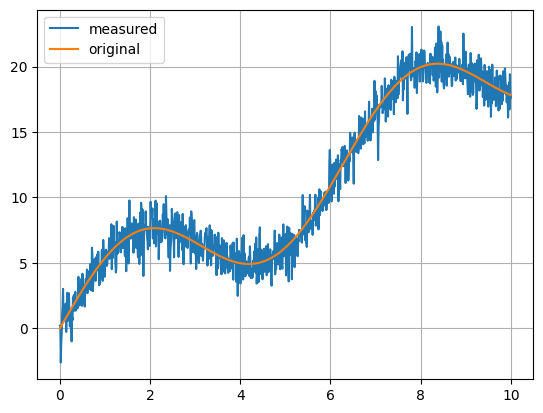

In [17]:
t = np.linspace(0, 10, 1000)

x = 2 * t + 4 * np.sin(t)

noise = np.random.normal(0, 1, 1000)

measurements = x + noise

plt.plot(t, measurements, label='measured')
plt.plot(t, x, label="original")
plt.grid(True)
plt.legend()

## Discrete Cosine Transform

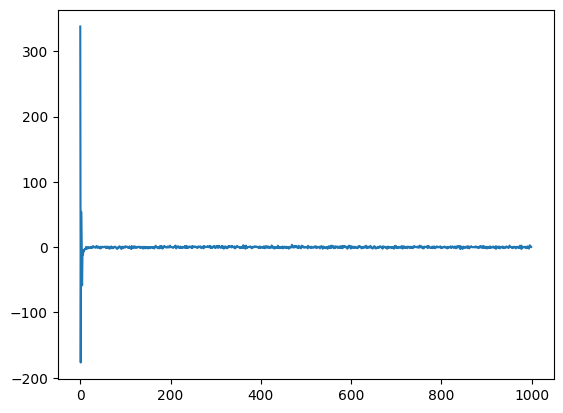

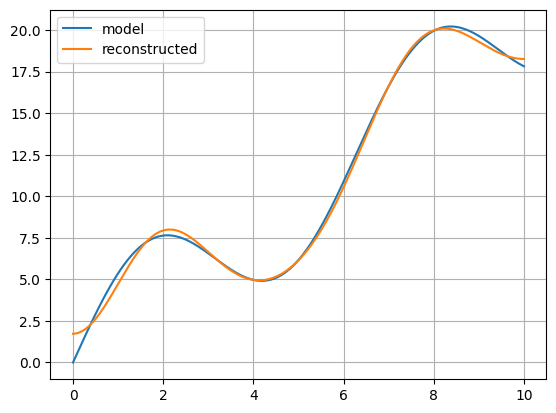

In [20]:
# compute discrete cosine transform of the noisy signal

dct = sp.fftpack.dct(measurements, norm='ortho')

plt.plot(dct)

# take only first 8 coefficients and reconstruct the signal

dct[8:] = 0


reconstructed_dct = sp.fftpack.idct(dct, norm='ortho')
plt.figure()
sns.lineplot(x=t, y=x, label='model')
sns.lineplot(x=t, y=reconstructed_dct, label='reconstructed')

plt.grid()

## Discrete Fourier Transform

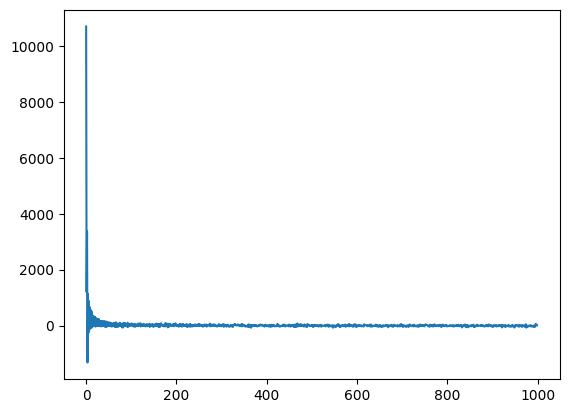

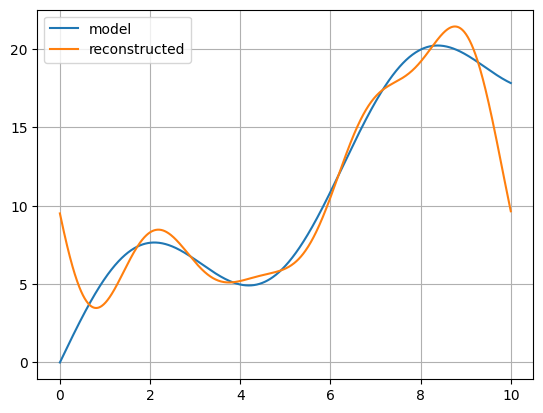

In [29]:
# compute dft of the noisy signal

dft = sp.fftpack.rfft(measurements)

plt.plot(dft)

# take only first 10 coefficients and reconstruct the signal

dft[10:] = 0

reconstructed_dft = sp.fftpack.irfft(dft)

plt.figure()
sns.lineplot(x=t, y=x, label='model')
sns.lineplot(x=t, y=reconstructed_dft, label='reconstructed')

plt.grid()

## Compare results

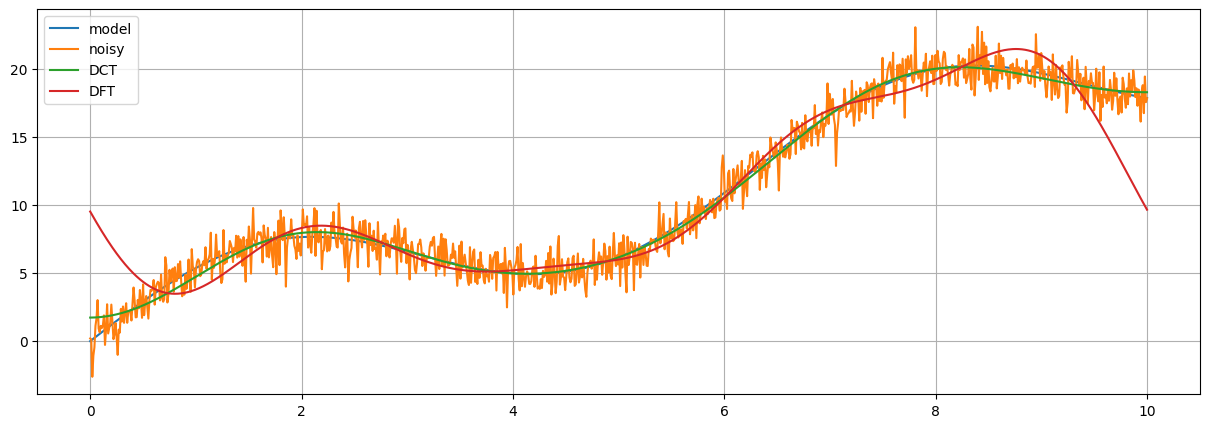

In [31]:
plt.figure(figsize=(15, 5))
sns.lineplot(x=t, y=x, label='model')
sns.lineplot(x=t, y=measurements, label='noisy')
sns.lineplot(x=t, y=reconstructed_dct, label='DCT')
sns.lineplot(x=t, y=reconstructed_dft, label='DFT')
plt.grid()


# Task 2

- take audio and corrupt its wave-file with a mono-frequency sound
- detect noisy sound using DFT and recover


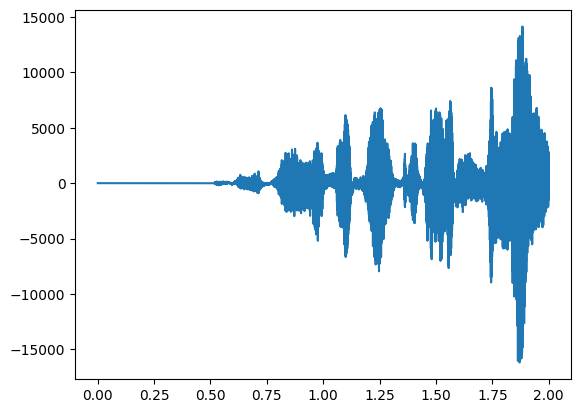

In [49]:
# load audio from audio/original.wav

from scipy.io import wavfile

rate, data = wavfile.read('audio/original.wav')

t = np.linspace(0, len(data) / rate, len(data))

plt.plot(t, data)

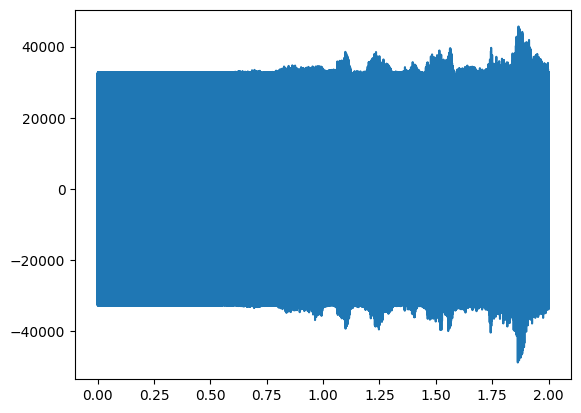

In [77]:
# corrupt the signal with sine wave

freq = 3000
amplitude = np.iinfo(np.int16).max

data_corrupted = data + np.sin(2 * np.pi * freq * t) * amplitude

plt.plot(t, data_corrupted)

In [78]:
# create corrupted wav file

wavfile.write('audio/corrupted.wav', rate, data_corrupted.astype(np.int16))


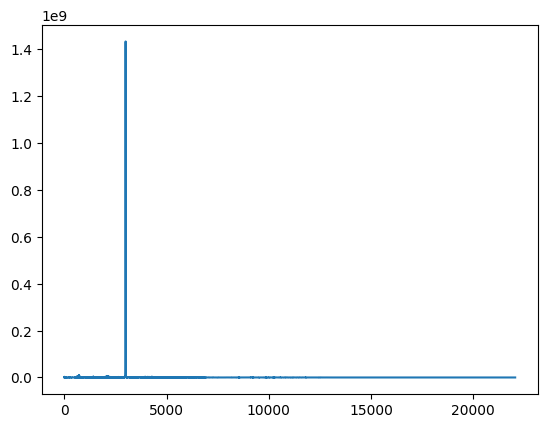

In [79]:
# compute dft of the corrupted signal

dft = sp.fft.rfft(data_corrupted)

freqs = np.fft.rfftfreq(len(t), t[1] - t[0])
plt.plot(freqs, np.abs(dft))

(0.0, 4000.0)

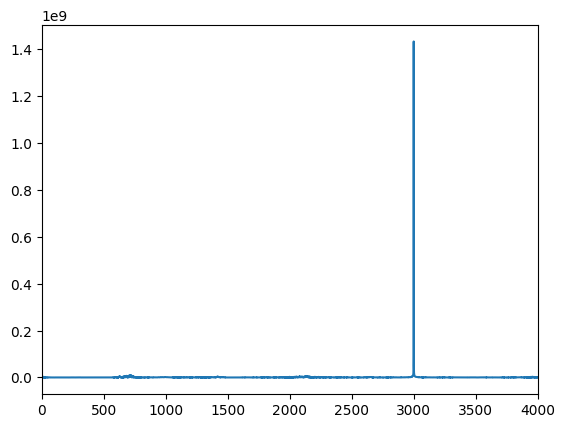

In [80]:
# detect the frequency of the sine wave


plt.plot(freqs, np.abs(dft))
plt.xlim([0, 4000])

/home/leo/study/s23-sensors/venv/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


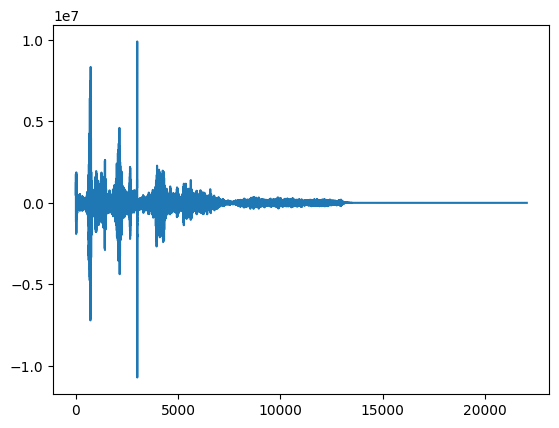

In [82]:
# filter frequencies with big value

dft[np.abs(dft) > 0.9 * 1e8] = 0
plt.plot(freqs, dft)

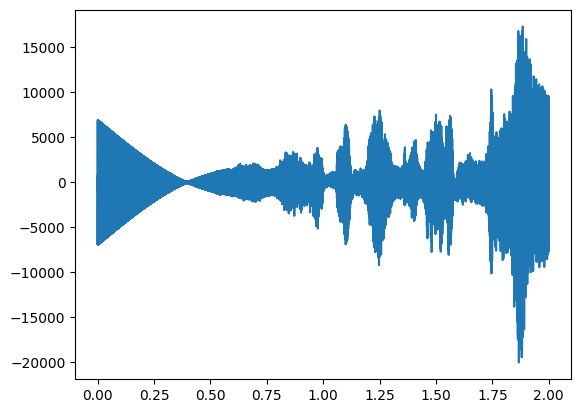

In [84]:
# construct the signal from the filtered frequencies
reconstructed = sp.fft.irfft(dft)

plt.plot(t, reconstructed)

# create reconstructed wav file
wavfile.write('audio/reconstructed.wav', rate, reconstructed.astype(np.int16))